# Árvore de Decisão e PCA (ACP)
## Motivação

- Desenvolvimento de uma árvore de decisão
- Visualização da árvore de decisão
- Importância de cada variável
- Poda da árvore
- Desenvolvimento de um modelo com PCA
- Condition monitoring of a hydraulic systems Data Set
- http://archive.ics.uci.edu/ml/datasets/Condition+monitoring+of+hydraulic+systems

In [1]:
# Carregando as bibliotecas 

library(data.table)
library(caret)
library(rpart.plot)
library(RColorBrewer)
library(rattle.data)

Warning message:
"package 'data.table' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: ggplot2

Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Loading required package: rpart

Warning message:
"package 'rpart' was built under R version 3.6.3"


In [2]:
# Carregando as 17 bases de dados com informações dos sensores
# Este seeria um projeto de inumeros dias, para estressar todas as possibilidades dos dados
# principalemente porque deve ser feito "feature engineering" e "dimensionality reduction", dado que os dados sao "brutos"
# apenas das informações lidas pelos sensores

In [3]:
setwd("F:/Meu Drive/Work/OMNP/Data Science (R)/Dados/CMHS")

In [4]:
# Importando arquivos .txt - função fread

# Sensores de Pressão
ps1 <- fread("ps1.txt", header = F) # fread tem uma otimização para subir bases grandes para a memória do computador
names(ps1) <- sub("V", "ps1_",names(ps1), fixed = T) # fixed é usado para substituir todos os Vs
ps2 <- fread("ps2.txt", header = F)
names(ps2) <- sub("V", "ps2_",names(ps2), fixed = T)
ps3 <- fread("ps3.txt", header = F)
names(ps3) <- sub("V", "ps3_",names(ps3), fixed = T)
ps4 <- fread("ps4.txt", header = F)
names(ps4) <- sub("V", "ps4_",names(ps4), fixed = T)
ps5 <- fread("ps5.txt", header = F)
names(ps5) <- sub("V", "ps5_",names(ps5), fixed = T)
ps6 <- fread("ps6.txt", header = F)
names(ps6) <- sub("V", "ps6_",names(ps6), fixed = T)

In [5]:
# Sensor do motor
eps1 <- fread("eps1.txt", header = F)
names(eps1) <- sub("V", "eps1_", names(eps1), fixed = T)

In [6]:
# Sensores de volume
fs1 <- fread("fs1.txt", header = F)
names(fs1) <- sub("V", "fs1", names(fs1), fixed = T)
fs2 <- fread("fs2.txt", header = F)
names(fs2) <- sub("V", "fs2_", names(fs2), fixed = T)

In [7]:
# Sensores de temperatura
ts1 <- fread("ts1.txt", header = F)
names(ts1) <- sub("V", "ts1_", names(ts1), fixed = T)
ts2 <- fread("ts2.txt", header = F)
names(ts2) <- sub("V", "ts2_", names(ts2), fixed = T)
ts3 <- fread("ts3.txt", header = F)
names(ts3) <- sub("V", "ts3_", names(ts3), fixed = T)
ts4 <- fread("ts4.txt", header = F)
names(ts4) <- sub("V", "ts4_", names(ts4), fixed = T)

In [8]:
# Sensor de vibração
vs1 <- fread("vs1.txt", header = F)
names(vs1) <- sub("V", "vs1_", names(vs1), fixed = T)

In [9]:
# Sencores de refrigeramento
ce <- fread("ce.txt", header = F)
names(ce) <- sub("V", "ce_", names(ce), fixed = T)
cp <- fread("cp.txt", header = F)
names(cp) <- sub("V", "cp_", names(cp), fixed = T)

In [10]:
# Sensor de eficiência
se <- fread("se.txt", header = F)
names(se) <- sub("V", "se_", names(se), fixed = T)

In [11]:
# Carregando a base com os alvos
profile <- fread("profile.txt", header = F)
names(profile) <- c("cooler", "valve", "leakage", "accumulator", "stable")

In [12]:
# União de todas as bases

data <- cbind(ps1, ps2, ps3, ps4, ps5, ps6, se, ts1, ts2, ts3, ts4, vs1, ce, cp, eps1, fs1, fs2, profile)

dim(data)

[1]  2205 43685

In [13]:
# Aqui vemos que é um claro problema de redução de dimensionalidade - mais de 43 mil variáveis
# Não faz sentido fazer AED com gráficos e todas estas variáveis

### Desenvolvimento do modelo - Árvore de Decisão

In [14]:
# Vamos modelar a flag stable, que é dicotomica

seed <- 42
set.seed(seed)
inTrain_stable <- createDataPartition(y = data$stable, p = 0.7, list = FALSE)
train_stable <- data[inTrain_stable, ]
test_stable <- data[-inTrain_stable, ]
dim(train_stable); dim(test_stable)

[1]  1544 43685

[1]   661 43685

In [15]:
 tree1 <- rpart(stable ~ ps1_1 + ps1_2 + ps1_3 + ps1_4 + ps1_5 
               + ps1_6 + ps1_7 + ps1_8 + ps1_9 + ps1_10
               + ps1_11 + ps1_12 + ps1_13 + ps1_14 + ps1_15
               + ps1_16 + ps1_17 + ps1_18 + ps1_19 + ps1_20
               + ps1_21 + ps1_22 + ps1_23 + ps1_24 + ps1_25
               + ps1_26 + ps1_27 + ps1_28 + ps1_29 + ps1_30
               + ps1_31 + ps1_32 + ps1_33 + ps1_34 + ps1_35
               + ps1_36 + ps1_37 + ps1_38 + ps1_39 + ps1_40
               + ps1_41 + ps1_42 + ps1_43 + ps1_44 + ps1_45
               + ps1_46 + ps1_47 + ps1_48 + ps1_49 + ps1_50
               + ps1_51 + ps1_52 + ps1_53 + ps1_54 + ps1_55
               + ps1_56 + ps1_57 + ps1_58 + ps1_59 + ps1_60
               + ce_1 + ce_2 + ce_3 + ce_4 + ce_5 
               + ce_6 + ce_7 + ce_8 + ce_9 + ce_10
               + ce_11 + ce_12 + ce_13 + ce_14 + ce_15
               + ce_16 + ce_17 + ce_18 + ce_19 + ce_20
               + ce_21 + ce_22 + ce_23 + ce_24 + ce_25
               + ce_26 + ce_27 + ce_28 + ce_29 + ce_30
               + ce_31 + ce_32 + ce_33 + ce_34 + ce_35
               + ce_36 + ce_37 + ce_38 + ce_39 + ce_40
               + ce_41 + ce_42 + ce_43 + ce_44 + ce_45
               + ce_46 + ce_47 + ce_48 + ce_49 + ce_50
               + ce_51 + ce_52 + ce_53 + ce_54 + ce_55
               + ce_56 + ce_57 + ce_58 + ce_59 + ce_60
               + cp_1 + cp_2 + cp_3 + cp_4 + cp_5 
               + cp_6 + cp_7 + cp_8 + cp_9 + cp_10
               + cp_11 + cp_12 + cp_13 + cp_14 + cp_15
               + cp_16 + cp_17 + cp_18 + cp_19 + cp_20
               + cp_21 + cp_22 + cp_23 + cp_24 + cp_25
               + cp_26 + cp_27 + cp_28 + cp_29 + cp_30
               + cp_31 + cp_32 + cp_33 + cp_34 + cp_35
               + cp_36 + cp_37 + cp_38 + cp_39 + cp_40
               + cp_41 + cp_42 + cp_43 + cp_44 + cp_45
               + cp_46 + cp_47 + cp_48 + cp_49 + cp_50
               + cp_51 + cp_52 + cp_53 + cp_54 + cp_55
               + cp_56 + cp_57 + cp_58 + cp_59 + cp_60
                , data = train_stable
                , method = "class"
                , control = rpart.control(minsplit = 5, cp = 0.0001), parms = list(split = 'gini'))

### Visualizando a árvore

In [17]:
fancyRpartPlot(tree1, caption = NULL) # Caption NULL remove a informação de quando a arvore foi gerada

ERROR: Error in fancyRpartPlot(tree1, caption = NULL): não foi possível encontrar a função "fancyRpartPlot"


### Importância de cada variável - Variable Importance

In [21]:
# Entendendo a importância de cada variável
# A árvore de decisão não precisa ser o modelo, mas pode servir para selecionar variáveis
tree1$variable.importance

ps1_1        ps1_4        ps1_3       ps1_10        ps1_2       ps1_11 
283.97930344 283.53596825 236.56608914 235.14053651 230.93372313 220.17751558 
      ps1_57        ce_24        ce_22        ce_23        ce_18         ce_5 
116.93560977 108.15338386 108.00220584 107.23907742 106.91752096 106.75674274 
        ce_6       ps1_56       ps1_60       ps1_52        ps1_6       ps1_50 
106.75674274 105.10478056  99.57528013  93.47213431  88.77091504  88.27793141 
       ps1_5       ps1_53       ps1_59       ps1_58       ps1_55        ps1_8 
 85.41008446  73.67119388  27.06147026  25.99015989  25.01723875  18.46353280 
      ps1_51       ps1_18         cp_5         cp_6        ps1_7         cp_3 
 18.24267956  16.87367951  16.87021974  16.87021974  16.13232060  16.11165488 
       cp_33         cp_1         cp_4        ps1_9         cp_2       ps1_49 
 15.79627329  15.71794333  15.36358899  15.24415670  14.95937847  14.60673753 
      ps1_12       ps1_13       ps1_26        cp_34        cp_38        cp_42 
 14.25280174  13.49734430  13.14632943  12.92422360  12.92422360  12.92422360 
       cp_55       ps1_23       ps1_54       ps1_22       ps1_27       ps1_48 
 12.92422360  10.85668108  10.73333333  10.13537188  10.02980769   9.04267956 
      ps1_44       ps1_25       ps1_19        ce_56       ps1_47       ps1_14 
  7.81618628   7.62980769   6.58843212   5.82835714   5.68753127   5.04001519 
       ce_47        ce_49        cp_25       ps1_40       ps1_41       ps1_39 
  4.88124814   4.83330390   4.41134952   4.38925646   4.36097114   4.28475036 
      ps1_36       ps1_43        ce_14        ce_34        cp_14        cp_24 
  4.21507962   4.14540888   3.74193548   3.74193548   3.74193548   3.74193548 
       cp_19        cp_57        cp_30        ce_59       ps1_32        cp_15 
  3.42857143   3.42857143   3.27272727   3.17136227   3.11652174   2.85714286 
       cp_27        ce_48       ps1_24        cp_18        ce_52         ce_1 
  2.85714286   2.74454893   2.40000000   2.27569457   2.08208105   2.01913876 
       ce_57       ps1_37        ce_55        cp_17        ce_60        ce_11 
  1.95961776   1.90384615   1.77605178   1.51712972   1.47414719   1.42857143 
       ce_17        ce_39        ce_58        ce_16        ce_51        cp_49 
  1.42857143   1.36421053   1.32160268   1.11546689   1.05296228   0.95587444 
       ce_54        ce_28        ce_50        ce_40        ce_31        cp_35 
  0.93554631   0.84819064   0.84236982   0.81852632   0.71718054   0.63049353 
       cp_20        ce_44        ce_19        ce_26        cp_11        cp_13 
  0.60631579   0.42409532   0.41733658   0.41122442   0.40421053   0.40421053 
       cp_21        cp_22        ce_13       ps1_21        ce_32       ps1_34 
  0.40421053   0.40421053   0.28079374   0.28079374   0.22219008   0.21556225 
      ps1_45        cp_26         cp_9       ps1_17       ps1_15        ce_33 
  0.21556225   0.20561221   0.19685578   0.14144247   0.10920434   0.10034391 
       ce_30        ce_43 
  0.08600906   0.08600906

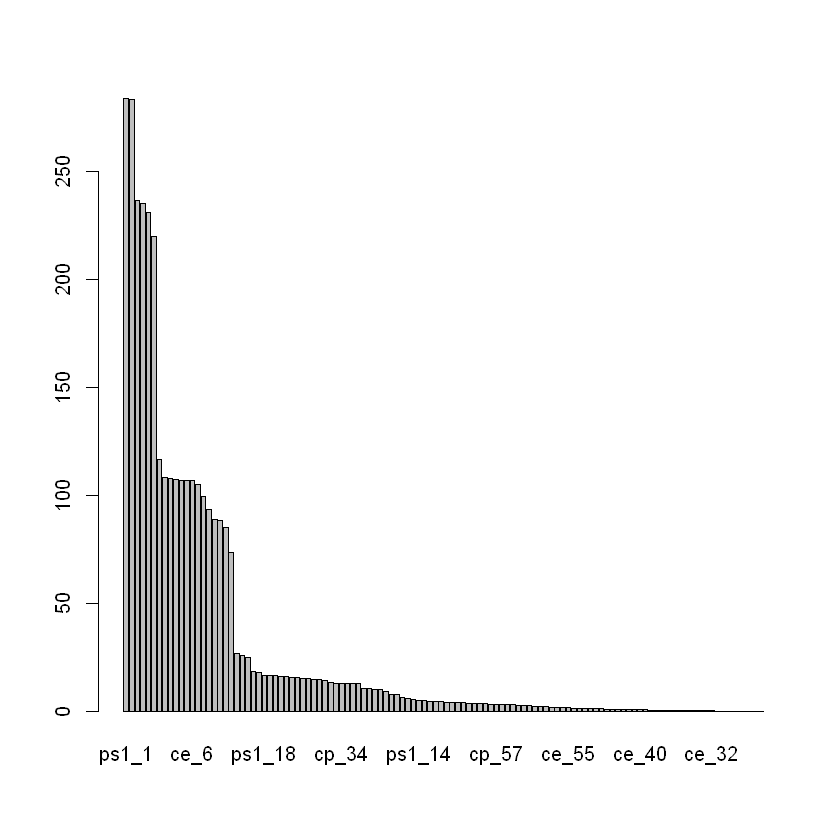

In [22]:
barplot(tree1$variable.importance)

### Avaliação do modelo

In [115]:
# Treinamento

pred_train_stable <- predict(tree1, train_stable, type = "class")
table(train_stable$stable, pred_train_stable)

# Classe 0
acc_train0_tree1 <- table(train_stable$stable, pred_train_stable)[1]/(table(train_stable$stable, pred_train_stable)[1]
                                +table(train_stable$stable, pred_train_stable)[3])*100

# Classe 1
acc_train1_tree1 <- table(train_stable$stable, pred_train_stable)[4]/(table(train_stable$stable, pred_train_stable)[2]
                                +table(train_stable$stable, pred_train_stable)[4])*100

# Treinamento Total
acc_train_tree1 <- (table(train_stable$stable, pred_train_stable)[1] + table(train_stable$stable, pred_train_stable)[4])/(dim(train_stable)[1])*100

   pred_train_stable
       0    1
  0 1003    4
  1   16  521

In [116]:
# Teste

pred_test_stable <- predict(tree1, test_stable, type = "class")
table(test_stable$stable, pred_test_stable)

# Classe 0
acc_test0_tree1 <- table(test_stable$stable, pred_test_stable)[1]/(table(test_stable$stable, pred_test_stable)[1]
                                +table(test_stable$stable, pred_test_stable)[3])*100

# Classe 1
acc_test1_tree1 <- table(test_stable$stable, pred_test_stable)[4]/(table(test_stable$stable, pred_test_stable)[2]
                                +table(test_stable$stable, pred_test_stable)[4])*100

# Teste Total
acc_test_tree1 <- (table(test_stable$stable, pred_test_stable)[1] + table(test_stable$stable, pred_test_stable)[4])/(dim(test_stable)[1])*100

   pred_test_stable
      0   1
  0 416  26
  1  24 195

In [117]:
round(acc_train0_tree1, 2)
round(acc_train1_tree1, 2)
round(acc_test0_tree1, 2)
round(acc_test1_tree1, 2)
round(acc_train_tree1, 2)
round(acc_test_tree1, 2)

[1] 99.6

[1] 97.02

[1] 94.12

[1] 89.04

[1] 98.7

[1] 92.44

In [118]:
# Diferença em pontos base entre treinamento e teste
# Resultado ruim para uma industria onde a aleatoriedade é baixa

round(acc_train0_tree1 - acc_test0_tree1, 2)
round(acc_train1_tree1 - acc_test1_tree1, 2)
round(acc_train_tree1 - acc_test_tree1, 2)

[1] 5.49

[1] 7.98

[1] 6.27

### Poda da árvore (prunning)

In [119]:
# Ao podar a árvore trazemos mais estaabilidade, pois ela está overfitada

printcp(tree1)


Classification tree:
rpart(formula = stable ~ ps1_1 + ps1_2 + ps1_3 + ps1_4 + ps1_5 + 
    ps1_6 + ps1_7 + ps1_8 + ps1_9 + ps1_10 + ps1_11 + ps1_12 + 
    ps1_13 + ps1_14 + ps1_15 + ps1_16 + ps1_17 + ps1_18 + ps1_19 + 
    ps1_20 + ps1_21 + ps1_22 + ps1_23 + ps1_24 + ps1_25 + ps1_26 + 
    ps1_27 + ps1_28 + ps1_29 + ps1_30 + ps1_31 + ps1_32 + ps1_33 + 
    ps1_34 + ps1_35 + ps1_36 + ps1_37 + ps1_38 + ps1_39 + ps1_40 + 
    ps1_41 + ps1_42 + ps1_43 + ps1_44 + ps1_45 + ps1_46 + ps1_47 + 
    ps1_48 + ps1_49 + ps1_50 + ps1_51 + ps1_52 + ps1_53 + ps1_54 + 
    ps1_55 + ps1_56 + ps1_57 + ps1_58 + ps1_59 + ps1_60 + ce_1 + 
    ce_2 + ce_3 + ce_4 + ce_5 + ce_6 + ce_7 + ce_8 + ce_9 + ce_10 + 
    ce_11 + ce_12 + ce_13 + ce_14 + ce_15 + ce_16 + ce_17 + ce_18 + 
    ce_19 + ce_20 + ce_21 + ce_22 + ce_23 + ce_24 + ce_25 + ce_26 + 
    ce_27 + ce_28 + ce_29 + ce_30 + ce_31 + ce_32 + ce_33 + ce_34 + 
    ce_35 + ce_36 + ce_37 + ce_38 + ce_39 + ce_40 + ce_41 + ce_42 + 
    ce_43 + ce_44 + ce_45 + c

In [120]:
# Se achar que deve podar

tree1_podada <- prune(tree1, cp = 0.017) #o novo cp éo desvio padrão da linha 10, que é o menor xerror

# Se treinarmos a arvore diretamente com ele, teriamos o mesmo resultado da poda

# Logico, o problema é que não sabemos a priore qual é o corte que ira produzir o mesmo erro

In [121]:
#fancyRpartPlot(tree1_podada)

In [122]:
print(tree1_podada)

n= 1544 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1544 537 0 (0.65220207 0.34779793)  
   2) ps1_56< 184.71 1359 395 0 (0.70934511 0.29065489)  
     4) ce_22>=27.3565 689  65 0 (0.90566038 0.09433962) *
     5) ce_22< 27.3565 670 330 0 (0.50746269 0.49253731)  
      10) ps1_3< 147.03 369  47 0 (0.87262873 0.12737127) *
      11) ps1_3>=147.03 301  18 1 (0.05980066 0.94019934)  
        22) ps1_56< 172.19 13   1 0 (0.92307692 0.07692308) *
        23) ps1_56>=172.19 288   6 1 (0.02083333 0.97916667) *
   3) ps1_56>=184.71 185  43 1 (0.23243243 0.76756757)  
     6) ps1_6>=151.315 41   0 0 (1.00000000 0.00000000) *
     7) ps1_6< 151.315 144   2 1 (0.01388889 0.98611111) *


### Avaliando após a poda

In [123]:
# Treinamento

pred_train_stable <- predict(tree1_podada, train_stable, type = "class")
table(train_stable$stable, pred_train_stable)

# Classe 0
acc_train0_tree1_p <- table(train_stable$stable, pred_train_stable)[1]/(table(train_stable$stable, pred_train_stable)[1]
                                +table(train_stable$stable, pred_train_stable)[3])*100

# Classe 1
acc_train1_tree1_p <- table(train_stable$stable, pred_train_stable)[4]/(table(train_stable$stable, pred_train_stable)[2]
                                +table(train_stable$stable, pred_train_stable)[4])*100

# Treinamento Total
acc_train_tree1_p <- (table(train_stable$stable, pred_train_stable)[1] + table(train_stable$stable, pred_train_stable)[4])/(dim(train_stable)[1])*100

# Teste

pred_test_stable <- predict(tree1_podada, test_stable, type = "class")
table(test_stable$stable, pred_test_stable)

# Classe 0
acc_test0_tree1_p <- table(test_stable$stable, pred_test_stable)[1]/(table(test_stable$stable, pred_test_stable)[1]
                                +table(test_stable$stable, pred_test_stable)[3])*100

# Classe 1
acc_test1_tree1_p <- table(test_stable$stable, pred_test_stable)[4]/(table(test_stable$stable, pred_test_stable)[2]
                                +table(test_stable$stable, pred_test_stable)[4])*100

# Teste Total
acc_test_tree1_p <- (table(test_stable$stable, pred_test_stable)[1] + table(test_stable$stable, pred_test_stable)[4])/(dim(test_stable)[1])*100

   pred_train_stable
      0   1
  0 999   8
  1 113 424

   pred_test_stable
      0   1
  0 433   9
  1  60 159

In [124]:
round(acc_train0_tree1_p, 2)
round(acc_train1_tree1_p, 2)
round(acc_test0_tree1_p, 2)
round(acc_test1_tree1_p, 2)
round(acc_train_tree1_p, 2)
round(acc_test_tree1_p, 2)

[1] 99.21

[1] 78.96

[1] 97.96

[1] 72.6

[1] 92.16

[1] 89.56

In [125]:
round(acc_train0_tree1_p - acc_test0_tree1_p, 2)
round(acc_train1_tree1_p - acc_test1_tree1_p, 2)
round(acc_train_tree1_p - acc_test_tree1_p, 2)

[1] 1.24

[1] 6.35

[1] 2.6

In [78]:
# Notoriamente existe mais estabilidade apos a poda, apesar da redução da capacidade preditiva
# Isto mostra claramente que estavamos em um overfitting e agora temos uma arvore muito mais estavel

# Faz sentido ter analise de condição de funcionamento estável com essa acurácia?
# Não deveriamos estar perto de 100%?

# O trabalho de "feature engineering" que deve ser feito mostra claramente o quanto um modelo bem feito
# que vai ser implementado em produção oficialmente, leva um tempo considerável para ser feito

### Desenvolvimento do modelo com PCA

In [79]:
# PCA

dataPCA <- prcomp(data[, 1:43680],
                 center = T)

In [80]:
summary(dataPCA)

Importance of components:
                             PC1       PC2       PC3       PC4       PC5
Standard deviation     7102.1745 3480.4136 1.112e+03 889.59513 827.66062
Proportion of Variance    0.7673    0.1843 1.882e-02   0.01204   0.01042
Cumulative Proportion     0.7673    0.9515 9.703e-01   0.98238   0.99280
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     345.49327 238.72423 230.66376 219.94018 194.92566
Proportion of Variance   0.00182   0.00087   0.00081   0.00074   0.00058
Cumulative Proportion    0.99461   0.99548   0.99629   0.99703   0.99760
                            PC11      PC12      PC13     PC14    PC15     PC16
Standard deviation     171.46826 147.92821 106.97338 98.99849 81.1200 78.47906
Proportion of Variance   0.00045   0.00033   0.00017  0.00015  0.0001  0.00009
Cumulative Proportion    0.99805   0.99838   0.99856  0.99871  0.9988  0.99890
                           PC17     PC18     PC19     PC20     PC21     PC

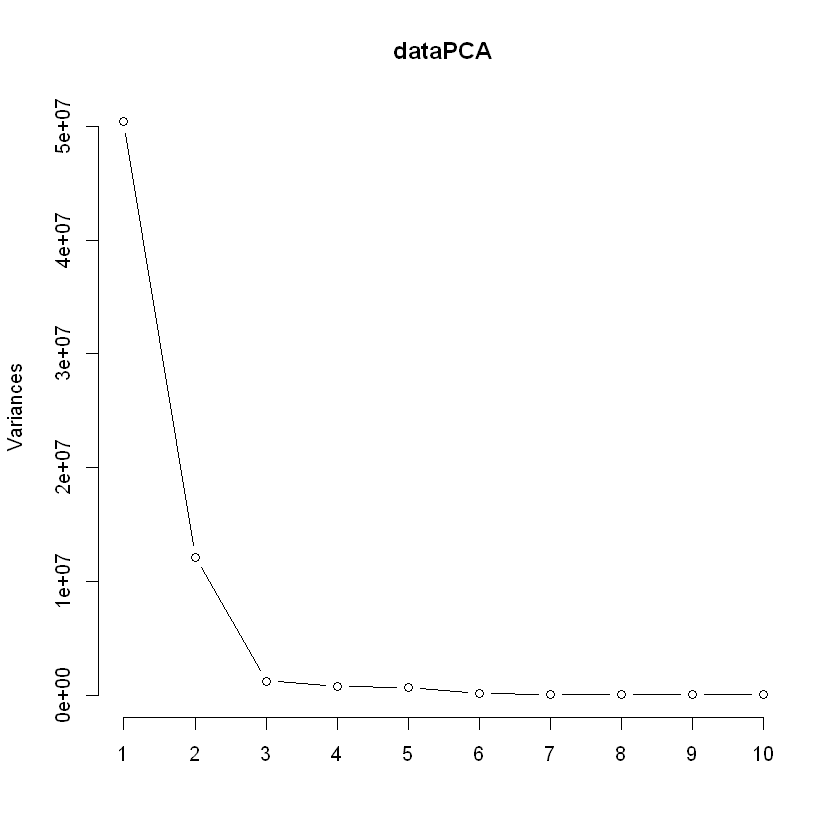

In [81]:
plot(dataPCA, type = 'lines')

In [82]:
data$PCA1 <- dataPCA$x[,1]
data$PCA2 <- dataPCA$x[,2]
data$PCA3 <- dataPCA$x[,3]
data$PCA4 <- dataPCA$x[,4]
data$PCA5 <- dataPCA$x[,5]
data$PCA6 <- dataPCA$x[,6]
data$PCA7 <- dataPCA$x[,7]
data$PCA8 <- dataPCA$x[,8]
data$PCA9 <- dataPCA$x[,9]
data$PCA10 <- dataPCA$x[,10]

In [83]:
# Treinamento de um novo modelo PCA

seed <- 42
set.seed(seed)
inTrain_stable <- createDataPartition(y = data$stable, p = 0.7, list = FALSE)
train_stable <- data[inTrain_stable, ]
test_stable <- data[-inTrain_stable, ]
dim(train_stable); dim(test_stable)

[1]  1544 43695

[1]   661 43695

In [84]:
treePCA <- rpart(stable ~ PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6 + PCA7 + PCA8 + PCA9 + PCA10
                , data = train_stable
                , method = "class"
                , control = rpart.control(minsplit = 5, cp = 0.002), parms = list(split = 'gini'))

In [85]:
fancyRpartPlot(treePCA, caption = NULL)

ERROR: Error in fancyRpartPlot(treePCA, caption = NULL): não foi possível encontrar a função "fancyRpartPlot"


In [86]:
# Vamos podar a arvore para ver se traz mais estabiliade

printcp(treePCA)


Classification tree:
rpart(formula = stable ~ PCA1 + PCA2 + PCA3 + PCA4 + PCA5 + PCA6 + 
    PCA7 + PCA8 + PCA9 + PCA10, data = train_stable, method = "class", 
    parms = list(split = "gini"), control = rpart.control(minsplit = 5, 
        cp = 0.002))

Variables actually used in tree construction:
 [1] PCA1  PCA10 PCA2  PCA3  PCA4  PCA5  PCA6  PCA7  PCA8  PCA9 

Root node error: 537/1544 = 0.3478

n= 1544 

          CP nsplit rel error  xerror     xstd
1  0.5567970      0  1.000000 1.00000 0.034850
2  0.1731844      1  0.443203 0.45438 0.026691
3  0.0521415      2  0.270019 0.28492 0.021863
4  0.0148976      3  0.217877 0.24209 0.020319
5  0.0111732      4  0.202980 0.23650 0.020104
6  0.0102421      6  0.180633 0.23464 0.020032
7  0.0074488      8  0.160149 0.20298 0.018743
8  0.0055866     12  0.130354 0.19367 0.018340
9  0.0046555     18  0.096834 0.19926 0.018583
10 0.0037244     20  0.087523 0.20298 0.018743
11 0.0027933     26  0.065177 0.19926 0.018583
12 0.0020000     28  

In [87]:
treePCA <- prune(treePCA, cp = 0.018)

In [88]:
fancyRpartPlot(treePCA)

ERROR: Error in fancyRpartPlot(treePCA): não foi possível encontrar a função "fancyRpartPlot"


PCA4      PCA5      PCA3      PCA1     PCA10      PCA2      PCA6 
401.20658 244.87267 223.01045 198.65543 195.48615 168.96901  33.28517

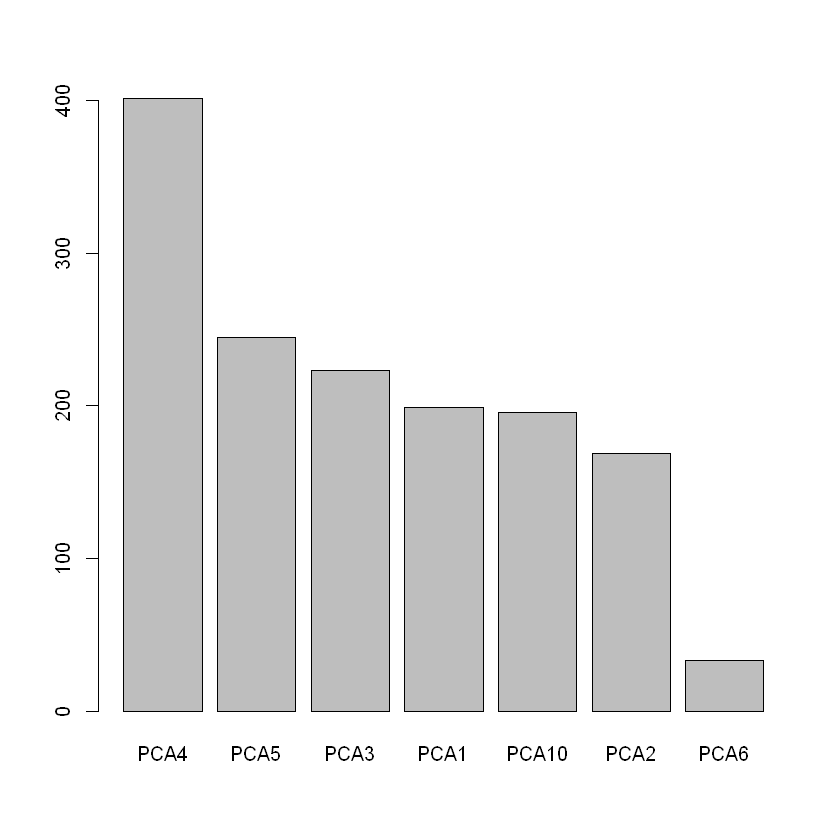

In [89]:
# Entendendo a importância de cada variável

treePCA$variable.importance

barplot(treePCA$variable.importance)

In [90]:
# Treinamento

pred_train_stable <- predict(treePCA, train_stable, type = "class")
table(train_stable$stable, pred_train_stable)

# Classe 0
acc_train0_treePCA <- table(train_stable$stable, pred_train_stable)[1]/(table(train_stable$stable, pred_train_stable)[1]
                                +table(train_stable$stable, pred_train_stable)[3])*100

# Classe 1
acc_train1_treePCA <- table(train_stable$stable, pred_train_stable)[4]/(table(train_stable$stable, pred_train_stable)[2]
                                +table(train_stable$stable, pred_train_stable)[4])*100

# Treinamento Total
acc_train_treePCA <- (table(train_stable$stable, pred_train_stable)[1] + table(train_stable$stable, pred_train_stable)[4])/(dim(train_stable)[1])*100

# Teste

pred_test_stable <- predict(treePCA, test_stable, type = "class")
table(test_stable$stable, pred_test_stable)

# Classe 0
acc_test0_treePCA <- table(test_stable$stable, pred_test_stable)[1]/(table(test_stable$stable, pred_test_stable)[1]
                                +table(test_stable$stable, pred_test_stable)[3])*100

# Classe 1
acc_test1_treePCA <- table(test_stable$stable, pred_test_stable)[4]/(table(test_stable$stable, pred_test_stable)[2]
                                +table(test_stable$stable, pred_test_stable)[4])*100

# Teste Total
acc_test_treePCA <- (table(test_stable$stable, pred_test_stable)[1] + table(test_stable$stable, pred_test_stable)[4])/(dim(test_stable)[1])*100

   pred_train_stable
      0   1
  0 940  67
  1  50 487

   pred_test_stable
      0   1
  0 405  37
  1  24 195

In [91]:
round(acc_train0_treePCA, 2)
round(acc_train1_treePCA, 2)
round(acc_test0_treePCA, 2)
round(acc_test1_treePCA, 2)
round(acc_train_treePCA, 2)
round(acc_test_treePCA, 2)

[1] 93.35

[1] 90.69

[1] 91.63

[1] 89.04

[1] 92.42

[1] 90.77

In [109]:
round(acc_train0_treePCA - acc_test0_treePCA, 2)
round(acc_train1_treePCA - acc_test1_treePCA, 2)
round(acc_train_treePCA - acc_test_treePCA, 2)

[1] 1.72

[1] 1.65

[1] 1.65

In [126]:
tree1_acc <- round(acc_train_tree1 - acc_test_tree1, 2)

tree1_p_acc <- round(acc_train_tree1_p - acc_test_tree1_p, 2)

tree_pca <- round(acc_train_treePCA - acc_test_treePCA, 2)

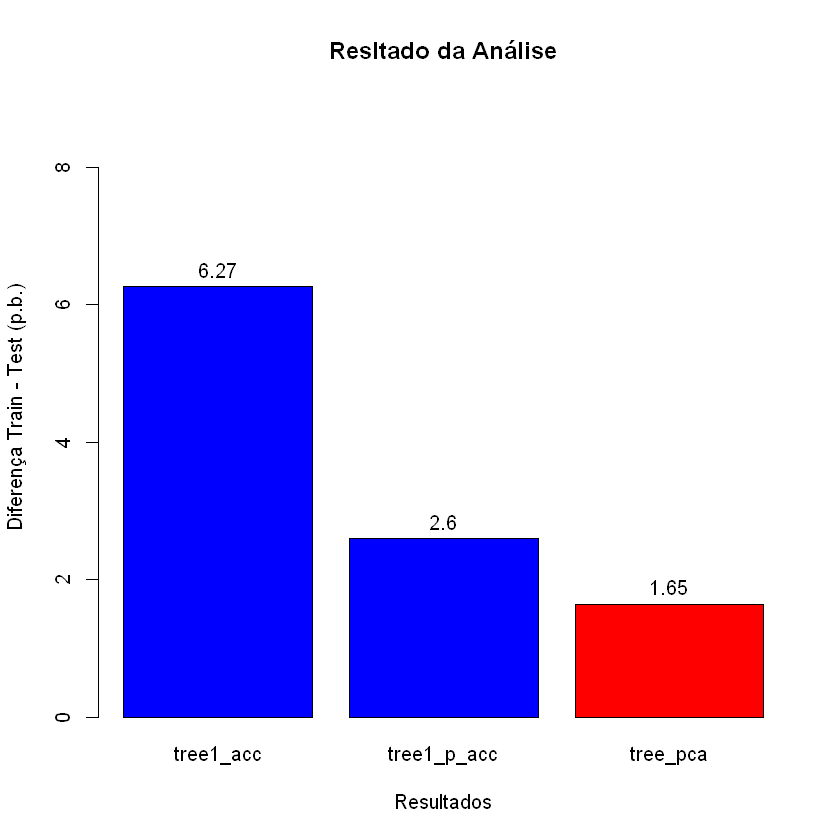

In [127]:
# tree1_acc e tree1_p_acc não deveriam estar com o mesmo valor, tem que ver isso e corrigir

barras <- c("tree1_acc", "tree1_p_acc", "tree_pca")
val_barras <- c(tree1_acc, tree1_p_acc, tree_pca)

barplot(val_barras
       , xlab = "Resultados"
       , ylab = "Diferença Train - Test (p.b.)"
       , main = "Resltado da Análise"
       , col = c("blue", "blue", "red")
       , names.arg = barras
       , ylim = c(0,9))

text(c(0.70, 1.9, 3.1), val_barras + 0.25, labels = as.character(val_barras))